### Задание 4.2.1-4.2.5

### Какую выборку мы используем для тренировки моделей машинного обучения?
### Ответ:Обучающую

### Зачем нужно разделение на валидационную и тестовую выборки?
### Ответ:Модель неявно обучается на валидационной выборке, поэтому нужно дополнительно проверить её на тестовой 

### Когда выборка делится на несколько частей, какая часть обычно самая большая?
### Ответ:Обучающая 

### Как называется метод разбиения выборки на несколько частей, чтобы последовательно обучить выборку на одной части, во время обучения проверять на второй и затем финально проверить на третьей?
### Ответ: hold-out 

### Какой класс из scikit-learn нужно использовать при разбиении, чтобы учесть распределение классов?
### StratifiedShuffleSplit 

### Сколько раз происходит обучение модели при k-fold-разбиении?
### Ответ: k

### Зачем используется k-fold-разбиение?
### Ответ: Чтобы проверить точность модели на нескольких наборах данных

### Что такое leave-one-out-разбиение?
### Ответ: Разбиение, при котором валидация происходит только на одном примере и повторяется для каждого наблюдения
### Частный случай *leave-p-out*-разбиения

### Какое количество обучений модели получится при leave-2-outразбиении при размере выборки 7?
### Ответ:21

### Какой класс нужно использовать для leave-p-out разбиения с параметром 3 в sklearn?
### Ответ:LeavePOut(3)

### Задание 4.2.11-4.2.14

### С помощью какого параметра можно отключить предварительное перемешивание примеров перед *k-fold* и *hold-out*-разбиением?
### Ответ:shuffle=False

### Какой метод используется в sklearn для hold-out-разбиения?
### Ответ: train_test_split()

### В вашей выборке 500 примеров данных и 5 признаков для каждого примера. Вы используете 10-fold разбиение. Сколько примеров будет отправляться в модель на каждой итерации обучения?
### Ответ: 50 450

### На сколько частей лучше всего делить выборку при использовании метода hold-out?
### Ответ: 3

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris_data = pd.read_csv('iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

In [11]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(iris_data, test_size=0.15, shuffle=True)

print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(iris_data.shape, train.shape, valid.shape)
)

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (127, 5)
Размер валидационной выборки: (23, 5)


In [59]:
def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()[classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]), width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

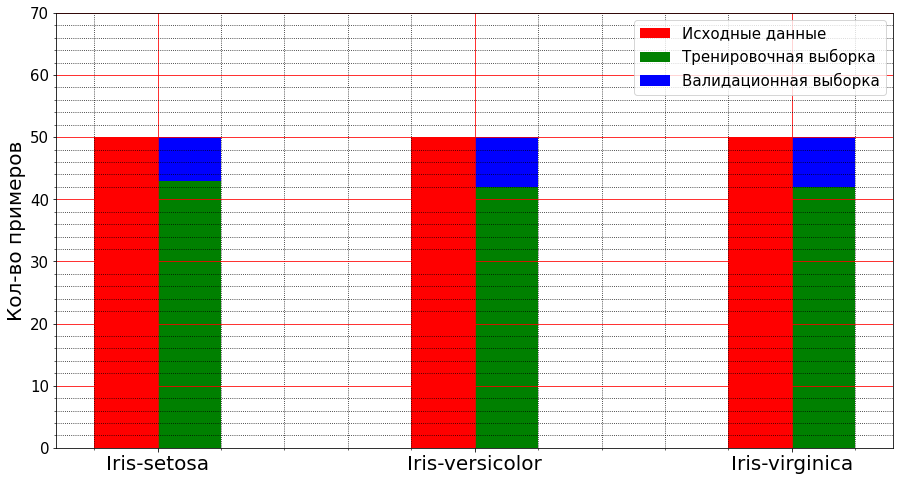

In [64]:
visualize_train_valid_counts(iris_data, s_train, s_valid)

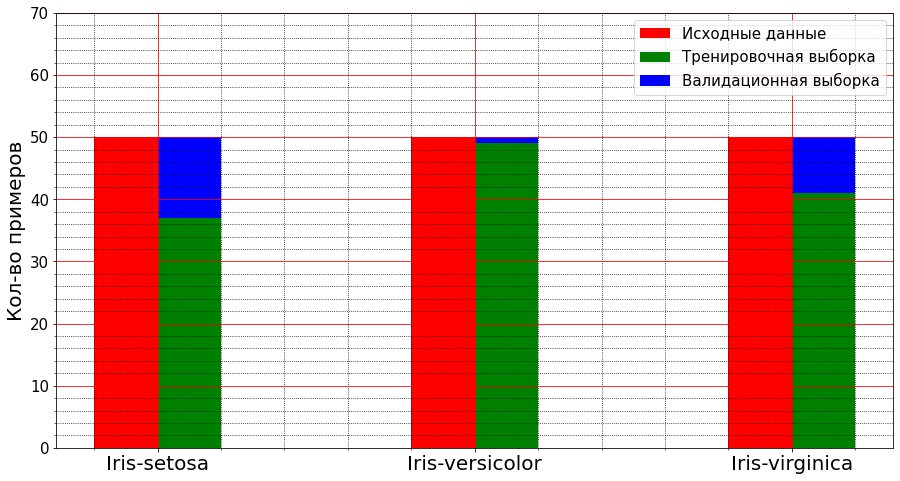

In [65]:
visualize_train_valid_counts(iris_data, train, valid)

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15)
train_indices, valid_indices = [split for split in sss.split(iris_data.iloc[:, :4], iris_data.iloc[:, 4])][0]
s_train = iris_data.iloc[train_indices]
s_valid = iris_data.iloc[valid_indices]

In [67]:
valid_frac = 0.15
test_frac = 0.15

valid_count = int(valid_frac * iris_data.shape[0])
test_count = int(test_frac * iris_data.shape[0])

train, valid_test = train_test_split(iris_data, 
                                     test_size=(valid_count + test_count))
valid, test = train_test_split(valid_test, test_size=test_count)

In [68]:
from sklearn.model_selection import KFold

# shuffle=False исключает предварительное перемешивание примеров
kf = KFold(n_splits=3, shuffle=False)

for train_index, valid_index in kf.split(iris_data):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
valid indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 

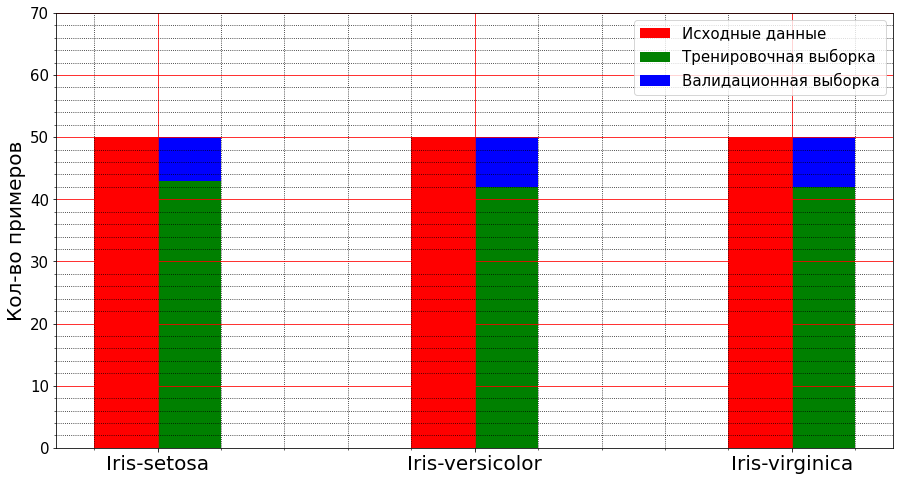

In [70]:
visualize_train_valid_counts(iris_data, s_train,s_valid)

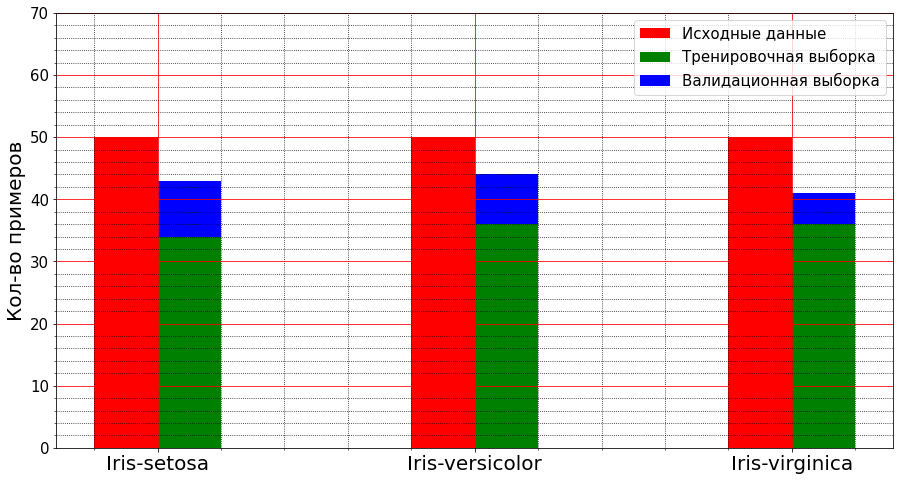

In [72]:
visualize_train_valid_counts(iris_data, train,valid)

In [34]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, valid_index in loo.split(iris_data[:5]):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [1 2 3 4]
valid indices: [0]
train indices: [0 2 3 4]
valid indices: [1]
train indices: [0 1 3 4]
valid indices: [2]
train indices: [0 1 2 4]
valid indices: [3]
train indices: [0 1 2 3]
valid indices: [4]


In [78]:
from sklearn.model_selection import train_test_split
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [79]:
vis_data

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,325555,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250302,325557,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250303,325562,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250304,325559,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


### Задание 4.4.1

### Что такое метрика качества?
### Ответ:Способ проверить, насколько хорошо модель решает задачу после обучения

### Задание 4.4.2

### Приведите примеры функций ошибок (loss functions).
### Ответ:MSE Cross-entropy

### Задание 4.4.3

### Что должно происходить со значением функции ошибки при обучении модели?
### Ответ:Значение функции ошибки должно снижаться во время обучения

### Задание 4.4.4

### Какая точность будет у алгоритма, случайно равновероятно возвращающего одно число из списка [1, 2, 3, 4] в виде предсказания, если правильными ответами считаются 1 и 3? Ответ запишите в виде десятичной дроби.
### Ответ: 0,5

### Задание 4.4.5

### 1.0/1.0 point (graded)

### Допустим, у вас есть выборки `y_true = [1.23, 2.35, 2.75]` и `y_pred = [1.01, 12.3, 2.74]`. Посчитайте метрику *RMSE*, округлите до сотых и запишите результат. Например, `3.14`

### Ответ:5,75

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

iris_data = pd.read_csv('iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

# Функция, выбирающая один класс из заданного кол-ва классов
def monetka(n_classes=3):
    classes = np.arange(n_classes)
    predicted = np.random.choice(classes)
    
    return predicted

# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])
y_hat = np.zeros((n, n_classes), dtype=np.float32)
for num in class_to_num.values():
    y_hat[:, num] = 1. * (y_pred == num)

from sklearn.metrics import log_loss

# Посчитаем значение ошибки
log_loss(y, y_hat)

24.867919006347655

In [2]:
n = 100    # размер выборки
p = 0.1    # доля примеров класса 1

from scipy import stats

# Сгенерируем n примеров с долей единиц равной p
dist = stats.bernoulli(p)
y_true = dist.rvs(n)
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
def calc_accuracy(y_true, y_pred):
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    acc = (TP + TN) / (P + N)
    
    return acc, TP, TN, P, N

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [6]:
vis_data = vis_data[[ 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
vis_data = vis_data.dropna()
X = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount']]
y = vis_data[['balance_due']]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
result = np.sqrt(mse)

In [7]:
result

132.0803344589909

In [11]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250305 entries, 0 to 250305
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fine_amount      250305 non-null  float64
 1   state_fee        250305 non-null  float64
 2   late_fee         250305 non-null  float64
 3   discount_amount  250305 non-null  float64
 4   balance_due      250305 non-null  float64
dtypes: float64(5)
memory usage: 11.5 MB


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score

### Задание 4.6.1-4.6.5

### Что такое $accuracy$?
### Ответ:- [ ]  Метрика для подсчёта отношения количества правильных ответов к общему количеству ответов.  Метрика, определяемая как (True Positives + True Negatives)/(Positives + Negatives)

### Используя библиотеку sklearn, найдите метод для подсчёта метрики $accuracy$. Создайте два одинаковых списка, состоящих из 100 одинаковых чисел. Замените в одном списке одно число на любое другое, отправьте эти списки в метод для подсчёта $accuracy$. Что выдаст алгоритм на выходе? Ответ запишите с точностью до сотых, в качестве разделителя используйте точку.
### Ответ:2, 0.91

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)


0.5

In [15]:
accuracy_score(y_true, y_pred, normalize=False)

2

In [19]:
import numpy
import sklearn.metrics
y_true = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
y_pred = [9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
r = sklearn.metrics.confusion_matrix(y_true, y_pred)
r=numpy.flip(r)

In [20]:
acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.99


In [ ]:
### В чём проблема метрики accuracy?
Метрика работает только в случае, когда классы имеют обозначение 0 и 1


In [ ]:
### Выберите верные утверждения:

### С помощью какой метрики мы можем учесть одновременно $precision$ и $recall$?
### Ответ:F1 score,F-beta score

### Задание 4.6.6-4.6.10

### Предположим, что у вас получилось создать модель-классификатор, которая не ошибается. Какое значение будет лежать вне главной диагонали в *confusion matrix* для предсказаний этой модели и истинных результатов?
### 0

### На этапе вычисления метрик вы получили результаты precision = 0.75 и recall = 0.6. Посчитайте значение метрики $f1$. Округлите до сотых и запишите результат.
### 0,67

### Допустим, у вас есть выборки y_true = [0, 0, 1, 1, 1, 1, 0, 1] и y_pred = [0, 1, 0, 0, 1, 1, 0, 1]. Посчитайте значение метрики $f1$. Округлите до сотых и запишите результат.
### 0.67

### Допустим, у вас есть выборки y_true = [0, 0, 1, 0, 0, 1, 0] и y_pred = [1, 1, 1, 0, 1, 1, 0]. Посчитайте значение метрики $precision$. Округлите до сотых и запишите результат.
### 0,4

### Допустим, у вас есть выборки y_true = [0, 0, 1, 0, 0, 1, 0] и y_pred = [1, 1, 1, 0, 1, 1, 0]. Посчитайте значение метрики $recall$. Округлите до сотых и запишите результат.
### 1

In [1]:
y_true = [1.23, 2.35, 2.75]

In [2]:
y_pred = [1.01, 12.3, 2.74]

In [3]:
from sklearn import metrics
MSE=metrics.mean_squared_error(y_true,y_pred)

In [4]:
print(MSE)

33.01700000000001


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [6]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [7]:
vis_data = vis_data[[ 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
vis_data = vis_data.dropna()
X = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount']]
y = vis_data[['balance_due']]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
result = np.sqrt(mse)

In [8]:
print(result)

132.0803344589909


In [9]:
y_true = [0, 0, 1, 0, 0, 1, 0]

In [10]:
y_pred = [1, 1, 1, 0, 1, 1, 0]

In [11]:
from sklearn.metrics import precision_score

In [12]:
precision_score(y_true, y_pred)

0.4

In [13]:
from sklearn.metrics import f1_score

In [14]:
f1_score(y_true, y_pred)

0.5714285714285715

In [15]:
from sklearn.metrics import recall_score

In [16]:
recall_score(y_true, y_pred)

1.0

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = pd.read_csv('voiceDataSet.csv')
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [20]:
data.head(21)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [21]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [22]:
labels = data[data.columns[-1]].values
feature_matrix = data[data.columns[:-1]].values

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.3, random_state=42)

In [25]:
scaler = StandardScaler()
train_feature_matrix = scaler.fit_transform(train_feature_matrix)
test_feature_matrix = scaler.transform(test_feature_matrix)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [27]:
clf = KNeighborsClassifier()
clf.fit(train_feature_matrix, train_labels)
pred_labels = clf.predict(test_feature_matrix)
accuracy_score(test_labels, pred_labels)

0.9737118822292324

In [28]:
import pandas as pd
import numpy as np
import scipy as sp
data_mean=np.mean(data)
data_std=np.std(data)
print('Mean: '+str(data_mean))
print('SD: '+str(data_std))

Mean: meanfreq     0.180907
sd           0.057126
median       0.185621
Q25          0.140456
Q75          0.224765
IQR          0.084309
skew         3.140168
kurt        36.568461
sp.ent       0.895127
sfm          0.408216
mode         0.165282
centroid     0.180907
meanfun      0.142807
minfun       0.036802
maxfun       0.258842
meandom      0.829211
mindom       0.052647
maxdom       5.047277
dfrange      4.994630
modindx      0.173752
dtype: float64
SD: meanfreq      0.029913
sd            0.016650
median        0.036354
Q25           0.048672
Q75           0.023636
IQR           0.042776
skew          4.239859
kurt        134.907364
sp.ent        0.044972
sfm           0.177493
mode          0.077191
centroid      0.029913
meanfun       0.032299
minfun        0.019217
maxfun        0.030073
meandom       0.525122
mindom        0.063289
maxdom        3.520601
dfrange       3.519484
modindx       0.119436
dtype: float64


C:\Users\medin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\medin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\medin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=o

In [29]:
def extract_features(directory, file):
    name = f'{directory}/{file}'
    y, sr = librosa.load(name, mono=True, duration=5)
    
    features = [] 
    features.append(file) # filename
    features.extend([np.mean(e) for e in librosa.feature.mfcc(y=y, sr=sr, 
                                                              n_mfcc=20)])  # mfcc_mean<0..20>
    features.extend([np.std(e) for e in librosa.feature.mfcc(y=y, sr=sr,
                                                             n_mfcc=20)])   # mfcc_std
    features.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T,
                            axis = 0)[0])     # cent_mean
    features.append(np.std(librosa.feature.spectral_centroid(y=y,sr=sr).T,
                           axis = 0)[0])       # cent_std
    features.append(scipy.stats.skew(librosa.feature.spectral_centroid(y=y,sr=sr).T,
                                     axis = 0)[0])    # cent_skew
    features.append(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, 
                            axis = 0)[0])      # rolloff_mean
    features.append(np.std(librosa.feature.spectral_rolloff(y=y, sr=sr).T, 
                           axis = 0)[0])       # rolloff_std
    

    features.append(directory.split('/')[-1])
    return features

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [50]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df, test_size=0.15, shuffle=True)

print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(df.shape, train.shape, valid.shape)
)

Размер исходной выборки: (214, 10)
Размер тренировочной выборки: (181, 10)
Размер валидационной выборки: (33, 10)


In [51]:
def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()[classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]), width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5)
cross_val_score(model, X, y, cv=kf, scoring="accuracy")

array([0.94323868, 0.94530273, 0.96309732, 0.95202652, 0.95065049])

### Задание 4.7.1

### Вычислите значение метрики  и введите полученное значение. Запишите ответ, округлив его до третьего знака после запятой.
### 0.973

### Задание 4.7.2

Сколько классов стекла представлено в этой задаче?
### 6

### Задание 4.7.3
Измените количество разбиений на 10. Вычислите среднее значение метрики  по 10 разбиениям и введите ниже, округлите до сотых.
### 

### Задание 4.7.4

### Сколько наблюдений осталось после удаления выбросов?
### 284


### У какой модели выше значение ROC AUC?
### KNN

### Задание 4.8.1-4.8.5

### Что такое *underfitting* (недообучение)?
### Проблема, при которой модель слишком сложная и выучивает данные, Проблема, при которой модель получила недостаточно данных для обучения

### Что такое overfitting (переобучение)?
### Проблема, при которой модель слишком сложная и выучивает данные верно

### Как можно обнаружить переобучение?
### Значение функции ошибки на валидации будет стабильно ниже, чем на обучении

### Какие есть способы избавиться от переобучения?
### Добавление данных,Уменьшение сложности модели 

### Какие есть способы избавиться от недообучения?
### Усложнение модели, Ослабевание параметров регуляризации

### Задание 4.8.6-4.8.9

Допустим, вы обучаете модель с деревьями (например, DecisionTreeClassifier) и видите недообучение. Что нужно делать с глубиной деревьев?
### Уменьшать глубину

Во время обучения DecisionTreeClassifier вы поняли, что данные не сбалансированы. Имеет ли в данном случае значение метрика, если вы хотите недопустить переобучение, и если да, то какую метрику лучше использовать?
### Имеет значение, лучше использовать f1 score

### Часто мы считаем, что данные несбалансированны, если соотношение классов в задаче бинарной классификации равно 10 к 1 или больше. У вас есть выборка, в которой соотношение классов подходит под нижний порог критерия несбалансированности. При этом, у вас в выборке 1460 записей. Сколько при этом в выборке записей класса-меньшинства? Ответ округлите вверх, если это необходимо.
### 133

### Вы обучали модель и поняли, что она переобучилась. Параметр C в модели обратно пропорционально отвечает за регуляризацию и в данный момент равен 1.. Вы решили изменить параметр C на 0.1, чтобы избавиться от переобучения. Чему будет равен параметр C?
### 0.9

In [43]:
from sklearn.tree import DecisionTreeClassifier

titanic = pd.read_csv('titanic.csv')
titanic.head()

# Заменить категориальный признак "Sex" на два признака "female" и "male" с бинарными значениями
sex_dummies = pd.get_dummies(titanic['Sex'])
titanic = titanic.drop('Sex', axis=1).join(sex_dummies)
# Отбросить имя человека из выборки
titanic = titanic.drop('Name', axis=1)
# Отделим target от признаков
X, y = titanic.iloc[:, 1:], titanic.iloc[:, 0]

C:\Users\medin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


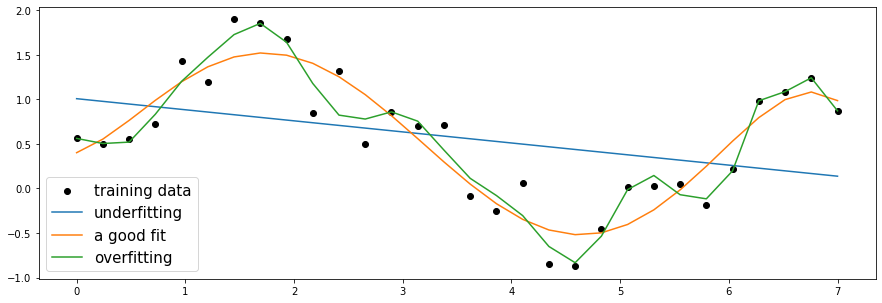

In [44]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

n_points = 30
x = np.linspace(0., 7., n_points)
y = np.sin(x) + np.random.rand(n_points)

plt.figure(figsize=(15, 5))
plt.scatter(x, y, color='k', label='training data')

for degree, label in zip([1, 5, 30], ['underfitting', 'a good fit', 'overfitting']):
    polynomial_coef = np.polyfit(x, y, deg=degree)
    inter_poly = np.polynomial.Polynomial(polynomial_coef[::-1])
    plt.plot(x, inter_poly(x), label=label)
plt.legend(fontsize=15)

In [45]:
from sklearn.tree import DecisionTreeClassifier

### Задание 4.9.1

### Загрузите данные [train.csv](https://drive.google.com/open?id=1wbB8sqdz667_SUDISF57qSaSAUhtwlmP), оставьте в данных только признаки `'fine_amount'`, `'state_fee'`,  `'late_fee'`, `'discount_amount'`, `'balance_due'`, `'compliance'`, затем избавьтесь от пропусков. Целевой переменной будет `'compliance'`, разделите данные на обучающую и тестовую выборки в соотношении 70%/30% без перемешивания. Обучите `DecisionTreeClassifier` из *scikit-learn* с параметром `random_state=23`. Посчитайте значения метрики $F1$ на тренировочной выборке и на тестовой выборке. Вычтите из значения метрики на тренировочной выборки значение метрики на тестовой выборке и запишите результат в переменную `result`.
### 0.080553414


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [48]:
vis_data=vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']].dropna()
X, y = vis_data.iloc[:, :-1], vis_data.iloc[:, -1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=123)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
train = f1_score(y_train,y_pred_train)
y_pred_valid = clf.predict(X_valid)
valid = f1_score(y_valid,y_pred_valid)
result = train - valid

In [49]:
print(result)

0.08055341409051786


### Задание 4.9.2

Какой эффект вы обнаружили после обучения?
### Переобучение

### Задание 4.9.3

Если бы вам нужно было бы приблизить функцию синуса полиномом, полином какой степени подошёл бы лучше?
### 1